# 13 Reasons Py
* more details here
* more details here

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import scipy.stats as stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

## Define initial variables

In [2]:
# File path for Substance Abuse & Mental Health Service Facilities (SAMHS)
SAMHS_File = "Resources/MentalHealth_SubstanceAbuse_Facilities.csv"

# File path for FED Crime Data (change the file name as required)
CrimeData_File = "Resources/CrimeData.csv"

# List of States to compare ?
State_list = ["NY","NC","OR","TX","MN"]

## SAMHS Facility Data

In [3]:
# Read SAMHS data to Dataframe
SAMHS_df = pd.read_csv(SAMHS_File)

# Group the data based on State
SAMHS_byState = SAMHS_df.groupby(["state"])

# Get count of Facility for each state, and create a Data frame
SAMHS_StateCount_df = pd.DataFrame({"Facility Count" : SAMHS_byState["name1"].count()})

# Reset the index, to have the state as a column/field
SAMHS_StateCount_df.reset_index(inplace=True)

# Preview dataframe
SAMHS_StateCount_df

,state,Facility Count
0,AK,170
1,AL,260
2,AR,311
3,AS,2
4,AZ,708
5,CA,1862
6,CO,533
7,CT,414
8,DC,52
9,DE,61


## Crime Data

In [4]:
# Read Crime data to Dataframe
CrimeData_df = pd.read_csv(CrimeData_File)
CrimeData_df

,state_id,state,year,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,total crime
0,1,AK,2017,739786,6338,62,NaN,1074.0,952,4250,26203,4167,17782,4254,139.0,65221.0
1,2,AL,2017,4875120,25469,419,NaN,2001.0,4233,18816,143774,31270,99707,12797,703.0,339189.0
2,3,AR,2017,3002997,16996,249,NaN,2140.0,1998,12609,94419,22369,64795,7255,538.0,223368.0
3,5,AZ,2017,7048876,35647,422,NaN,3622.0,7440,24163,204999,37722,148251,19026,1189.0,482481.0
4,6,CA,2017,39399349,178597,1830,NaN,14724.0,56625,105418,987063,176679,642019,168365,8648.0,2339968.0
5,7,CO,2017,5615902,20901,222,NaN,4021.0,3868,12790,152032,22618,107470,21944,1053.0,346919.0
6,8,CT,2017,3573880,8190,105,NaN,850.0,2813,4422,63646,8906,47418,7322,341.0,144013.0
7,10,DC,2017,695691,6976,116,NaN,444.0,2625,3791,29736,1809,25340,2587,224.0,73648.0
8,11,DE,2017,957078,4377,51,NaN,351.0,1082,2893,23430,3960,18108,1362,138.0,55752.0
9,12,FL,2017,20976812,85606,1057,NaN,7936.0,18597,58016,527125,88835,395375,42915,1355.0,1226817.0


## Combine Facility and Crime Data

In [5]:
# Combine SAMHS Facility Dataframe and Crime Dataframe
Reasons13All_df = pd.merge(SAMHS_StateCount_df, CrimeData_df, how="inner", on="state")
Reasons13All_df

,state,Facility Count,state_id,year,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,total crime
0,AK,170,1,2017,739786,6338,62,NaN,1074.0,952,4250,26203,4167,17782,4254,139.0,65221.0
1,AL,260,2,2017,4875120,25469,419,NaN,2001.0,4233,18816,143774,31270,99707,12797,703.0,339189.0
2,AR,311,3,2017,3002997,16996,249,NaN,2140.0,1998,12609,94419,22369,64795,7255,538.0,223368.0
3,AZ,708,5,2017,7048876,35647,422,NaN,3622.0,7440,24163,204999,37722,148251,19026,1189.0,482481.0
4,CA,1862,6,2017,39399349,178597,1830,NaN,14724.0,56625,105418,987063,176679,642019,168365,8648.0,2339968.0
5,CO,533,7,2017,5615902,20901,222,NaN,4021.0,3868,12790,152032,22618,107470,21944,1053.0,346919.0
6,CT,414,8,2017,3573880,8190,105,NaN,850.0,2813,4422,63646,8906,47418,7322,341.0,144013.0
7,DC,52,10,2017,695691,6976,116,NaN,444.0,2625,3791,29736,1809,25340,2587,224.0,73648.0
8,DE,61,11,2017,957078,4377,51,NaN,351.0,1082,2893,23430,3960,18108,1362,138.0,55752.0
9,FL,987,12,2017,20976812,85606,1057,NaN,7936.0,18597,58016,527125,88835,395375,42915,1355.0,1226817.0


## Standardization of Crime and Facility Data
* [Federal 2017 report](https://www.fbi.gov/news/pressrel/press-releases/fbi-releases-2017-crime-statistics)
* Facility and Crime data to be Standardized, to count per 100,000 individuals.

    "Count per 100,000" = ("Count" / "Population") * 100,000

In [6]:
# Data Mupulation / conversion

#Facility Count / population, and per 100k, defined earlier per_population = 100,000
Reasons13All_df["Facility Count (per 100K)"] = Reasons13All_df["Facility Count"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["violent_crime (per 100K)"] = Reasons13All_df["violent_crime"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["homicide (per 100K)"] = Reasons13All_df["homicide"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["rape_revised (per 100K)"] = Reasons13All_df["rape_revised"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["robbery (per 100K)"] = Reasons13All_df["robbery"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["aggravated_assault (per 100K)"] = Reasons13All_df["aggravated_assault"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["property_crime (per 100K)"] = Reasons13All_df["property_crime"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["burglary (per 100K)"] = Reasons13All_df["burglary"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["larceny (per 100K)"] = Reasons13All_df["larceny"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["motor_vehicle_theft (per 100K)"] = Reasons13All_df["motor_vehicle_theft"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["arson (per 100K)"] = Reasons13All_df["arson"] * 100000.0 / Reasons13All_df["population"]
Reasons13All_df["total crime (per 100K)"] = Reasons13All_df["total crime"] * 100000.0 / Reasons13All_df["population"]

# preview DF
Reasons13All_df.sort_values('Facility Count (per 100K)',ascending=True)

,state,Facility Count,state_id,year,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,...,homicide (per 100K),rape_revised (per 100K),robbery (per 100K),aggravated_assault (per 100K),property_crime (per 100K),burglary (per 100K),larceny (per 100K),motor_vehicle_theft (per 100K),arson (per 100K),total crime (per 100K)
43,TX,755,48,2017,28322717,123984,1405,NaN,14536.0,32120,...,4.960682,51.322760,113.407199,268.063971,2553.226091,471.204793,1842.220858,239.800440,11.686732,5993.648138
40,SC,194,45,2017,5021219,25412,380,NaN,2576.0,3884,...,7.567883,51.302283,77.351735,369.870344,3193.806126,620.666018,2288.906339,284.233769,13.423035,7413.219778
33,NV,122,37,2017,2972405,16663,266,NaN,1896.0,4841,...,8.948982,63.786732,162.864751,324.989360,2634.903386,674.504316,1529.367633,431.031438,12.447833,6403.434256
10,GA,482,13,2017,10413055,37118,681,NaN,2646.0,9844,...,6.539868,25.410410,94.535177,229.970936,2858.440679,531.669140,2076.739247,250.032291,8.863873,6438.658012
9,FL,987,12,2017,20976812,85606,1057,NaN,7936.0,18597,...,5.038897,37.832250,88.655035,276.572055,2512.893761,423.491425,1884.819295,204.583042,6.459513,5848.443510
4,CA,1862,6,2017,39399349,178597,1830,NaN,14724.0,56625,...,4.644747,37.371176,143.720649,267.562797,2505.277435,448.431267,1629.516772,427.329396,21.949601,5939.103207
45,VA,438,51,2017,8465207,17811,470,NaN,3026.0,4331,...,5.552138,35.746320,51.162364,117.941593,1801.668878,218.825127,1462.598611,120.245140,9.733962,4033.876549
1,AL,260,2,2017,4875120,25469,419,NaN,2001.0,4233,...,8.594660,41.045144,86.828632,385.959730,2949.137662,641.420109,2045.221451,262.496103,14.420158,6957.551814
18,LA,275,22,2017,4670818,25986,576,NaN,1850.0,5385,...,12.331887,39.607623,115.290298,389.118137,3367.118993,730.814174,2398.766126,237.538692,12.867125,7859.801003
8,DE,61,11,2017,957078,4377,51,NaN,351.0,1082,...,5.328719,36.674127,113.052437,302.274214,2448.076332,413.759380,1892.008802,142.308150,14.418887,5825.230545


In [7]:
# Just a view of how data standardization, helped shaping the data to compare. 
Reasons13All_df[["state","year","population","Facility Count","total crime", "Facility Count (per 100K)","total crime (per 100K)"]]

,state,year,population,Facility Count,total crime,Facility Count (per 100K),total crime (per 100K)
0,AK,2017,739786,170,65221.0,22.979618,8816.198198
1,AL,2017,4875120,260,339189.0,5.333202,6957.551814
2,AR,2017,3002997,311,223368.0,10.356321,7438.169269
3,AZ,2017,7048876,708,482481.0,10.044155,6844.793411
4,CA,2017,39399349,1862,2339968.0,4.725966,5939.103207
5,CO,2017,5615902,533,346919.0,9.490906,6177.440418
6,CT,2017,3573880,414,144013.0,11.584049,4029.598084
7,DC,2017,695691,52,73648.0,7.474583,10586.309152
8,DE,2017,957078,61,55752.0,6.373566,5825.230545
9,FL,2017,20976812,987,1226817.0,4.705195,5848.443510


## Statistical Analysis

## Crime selection
* Total crime has been selected for the following study
* Specificaly "total crime (per 100K)" is the sum of all crimes, standardized factoring population.

In [8]:
# checking only Total Crime
Reasons13All_df["crime count (per 100K)"] = Reasons13All_df["total crime (per 100K)"]
Reasons13_df = Reasons13All_df[["state","year","population","Facility Count (per 100K)","crime count (per 100K)"]]
# Reasons13_df

## Statistical Data for USA

In [9]:
# National average of Facility count and Crime Count
US_Facility_Average = Reasons13_df["Facility Count (per 100K)"].mean()
US_Crime_Average = Reasons13_df["crime count (per 100K)"].mean()

## Visual 1.  Scatter plot of Crime count vs Facility Count, for each of the states and territories

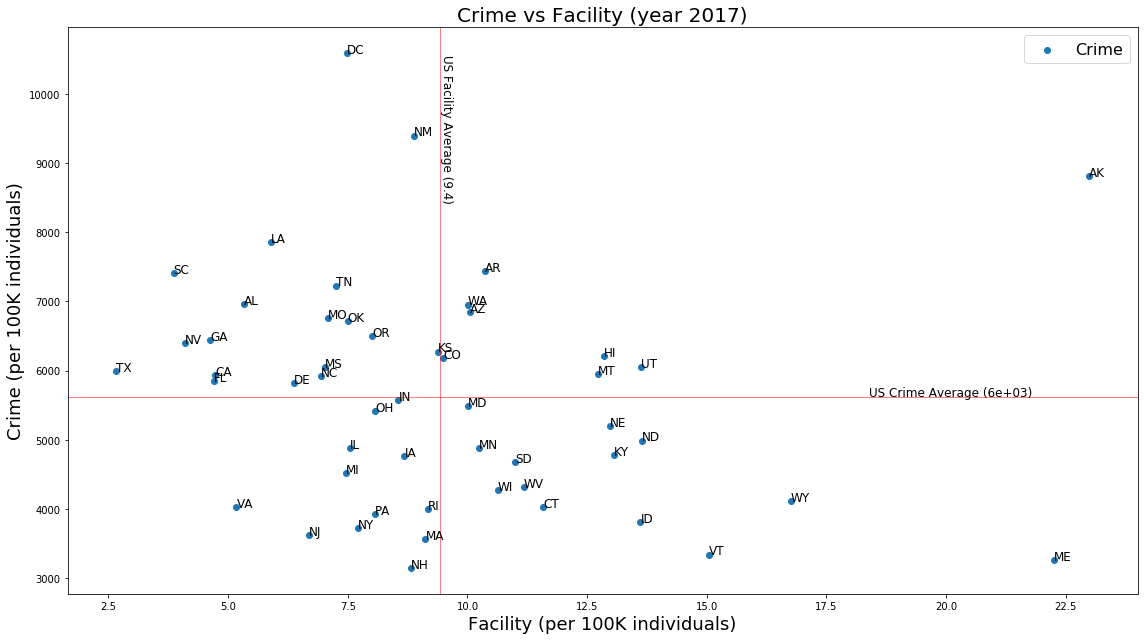

In [10]:
Reasons13_reduced_df = Reasons13_df
Facility_Count = Reasons13_reduced_df["Facility Count (per 100K)"]
Crime_Count = Reasons13_reduced_df["crime count (per 100K)"]

fig, ax = plt.subplots(figsize=(16,9))

ax.scatter(Facility_Count, Crime_Count, marker="o", label='Crime')

font = { 'color':  'orange',
        'weight': 'normal',
        'size': 16,
        }
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Crime (per 100K individuals)', fontdict={"size":18})
ax.legend(loc="best", fontsize=font["size"])
ax.set_title('Crime vs Facility (year 2017)', fontdict = {"size":20})
ax.set_xlabel('Facility (per 100K individuals)', fontdict={"size":18})

#Marking for national average 
ax.axvline(US_Facility_Average, linestyle='-', color='red', alpha=0.5, linewidth=1)
ax.axhline(US_Crime_Average, linestyle='-', color='red', alpha=0.5, linewidth=1)

ax.text(x = US_Facility_Average , y = Crime_Count.max()*0.8, s = "US Facility Average ({:.2})".format(US_Facility_Average), size = 12, horizontalalignment='left', rotation=-90, color='black')
ax.text(x = Facility_Count.max()*0.8 , y = US_Crime_Average, s = "US Crime Average ({:,.1})".format(US_Crime_Average), size = 12, rotation=0, color='black')

# mark each data points
for index, row in Reasons13_reduced_df.iterrows():
    ax.text(x = row["Facility Count (per 100K)"] , y = row["crime count (per 100K)"], s = row["state"], size = 12)
    
fig.tight_layout()
# Save the Figure
fig.savefig("Output/AllStateCrime_Facility_Scatter.png")

## Visual 2.  Scatter plot of Crime count vs Facility count, for selected states

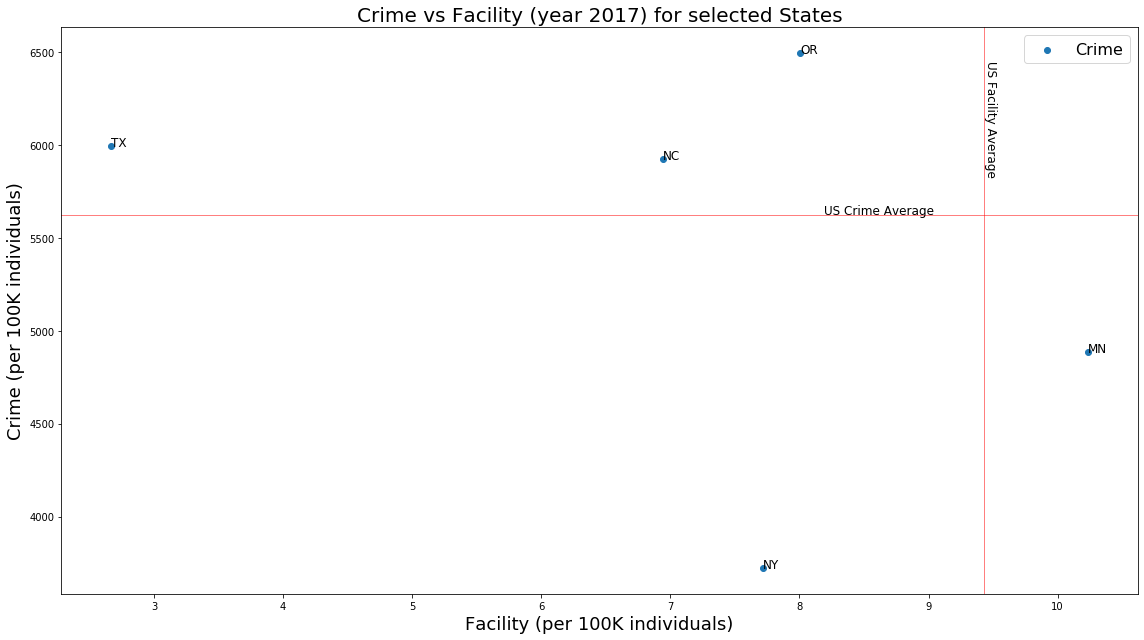

In [11]:
Reasons13_reduced_df = Reasons13_df[Reasons13_df.state.isin(State_list)]
Facility_Count = Reasons13_reduced_df["Facility Count (per 100K)"]
Crime_Count = Reasons13_reduced_df["crime count (per 100K)"]

fig, ax = plt.subplots(figsize=(16,9))

ax.scatter(Facility_Count, Crime_Count, marker="o", label='Crime')

font = { 'color':  'orange',
        'weight': 'normal',
        'size': 16,
        }
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Crime (per 100K individuals)', fontdict={"size":18})
ax.legend(loc="best", fontsize=font["size"])
ax.set_title('Crime vs Facility (year 2017) for selected States', fontdict = {"size":20})
ax.set_xlabel('Facility (per 100K individuals)', fontdict={"size":18})

#Marking for national average 
ax.axvline(US_Facility_Average, linestyle='-', color='red', alpha=0.5, linewidth=1)
ax.axhline(US_Crime_Average, linestyle='-', color='red', alpha=0.5, linewidth=1)

ax.text(x = US_Facility_Average , y = Crime_Count.max()*0.9, s = "US Facility Average", size = 12, horizontalalignment='left', rotation=-90, color='black')
ax.text(x = Facility_Count.max()*0.8 , y = US_Crime_Average, s = "US Crime Average", size = 12, rotation=0, color='black')

# mark each data points
for index, row in Reasons13_reduced_df.iterrows():
    ax.text(x = row["Facility Count (per 100K)"] , y = row["crime count (per 100K)"], s = row["state"], size = 12)
    
fig.tight_layout()
# Save the Figure
fig.savefig("Output/SelectedStateCrime_Facility_Scatter.png")

## Visual 3.  Bar chart of Facility and Crime count, for each of the states and territories

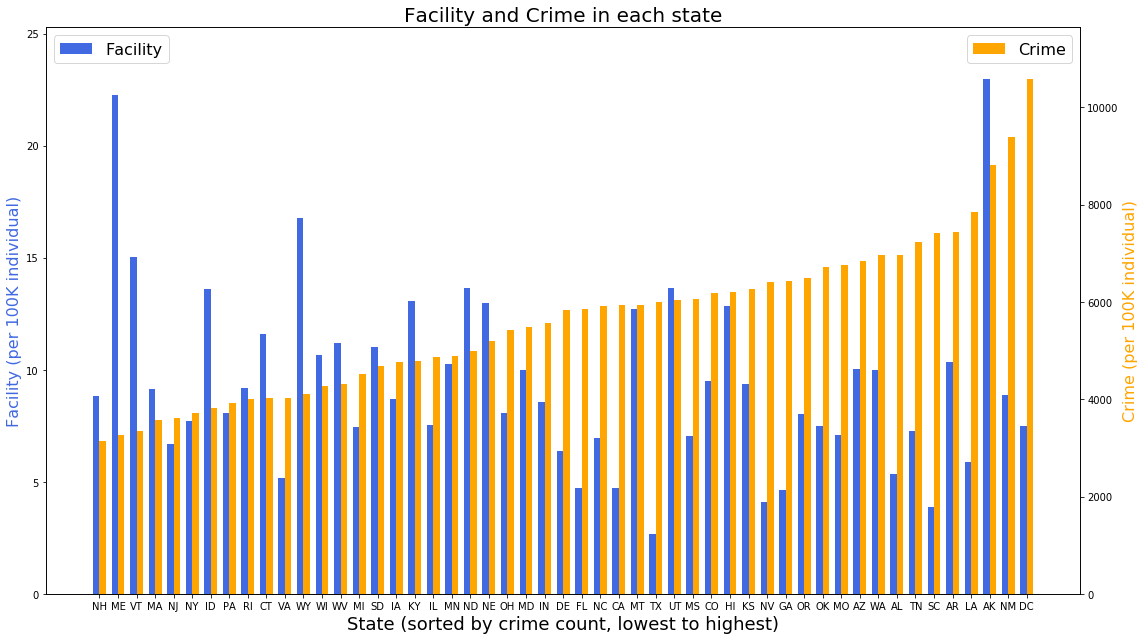

In [12]:
Reasons13_reduced_df = Reasons13_df
Reasons13_reduced_df = Reasons13_reduced_df.sort_values('crime count (per 100K)',ascending=True)
width = 0.35
labels = Reasons13_reduced_df["state"]
Facility_Count = Reasons13_reduced_df["Facility Count (per 100K)"]
Crime_Count = Reasons13_reduced_df["crime count (per 100K)"]

x = np.arange(len(labels))

fig, ax1 = plt.subplots(figsize=(16,9))

font = { 'color':  'royalblue',
        'weight': 'normal',
        'size': 16,
        }
rects1 = ax1.bar(x - width/2, Facility_Count, width, label='Facility', color=font["color"])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Facility (per 100K individual)', fontdict=font)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylim(ymin=0, ymax=(Facility_Count.max())*1.1)
ax1.legend(loc="upper left", fontsize=font["size"])
ax1.set_title('Facility and Crime in each state', fontdict = {"size":20})
ax1.set_xlabel('State (sorted by crime count, lowest to highest)', fontdict={"size":18})

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

font = { 'color':  'orange',
        'weight': 'normal',
        'size': 16,
        }
rects2 = ax2.bar(x + width/2, Crime_Count, width, label='Crime',color=font["color"])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Crime (per 100K individual)', fontdict=font)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylim(ymin=0, ymax=(Crime_Count.max())*1.1)
ax2.legend(loc="upper right", fontsize=font["size"])
# added these three lines
# lns = rects1+rects2
# labs = [l.get_label() for l in lns]
# ax2.legend(lns, labs, loc="upper right")

fig.tight_layout()
fig.savefig("Output/AllStatesBar_Facility_Crime_Bar.png")

## Visual 4.  Bar chart of Facility count in each state, sorted most availability to less availibility

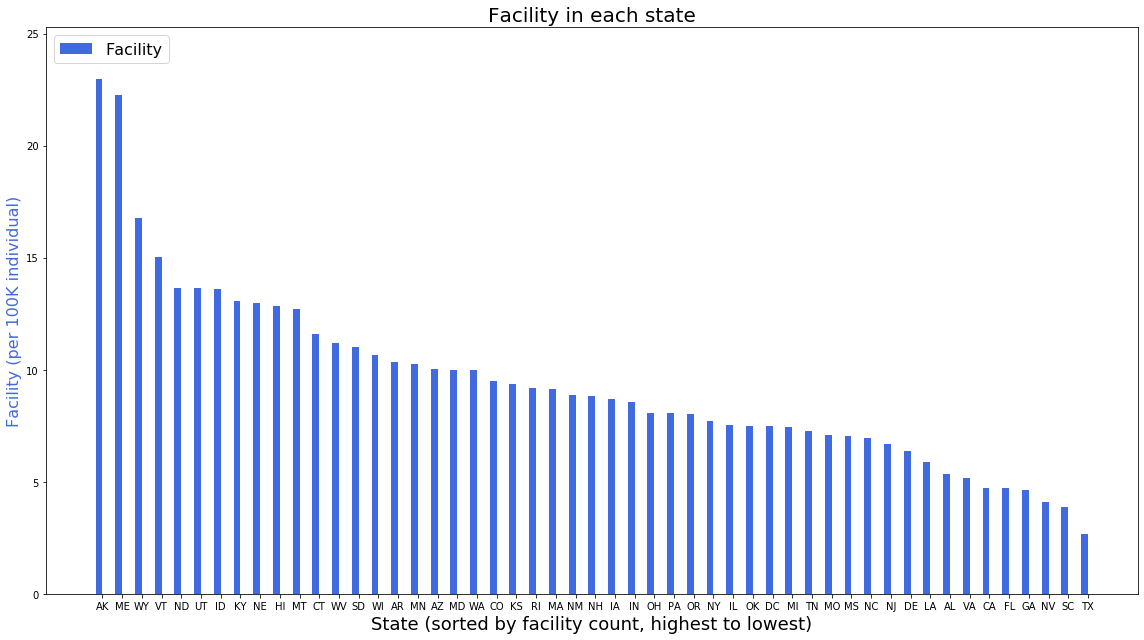

In [13]:
Reasons13_reduced_df = Reasons13_df
Reasons13_reduced_df = Reasons13_reduced_df.sort_values('Facility Count (per 100K)',ascending=False)
width = 0.35
labels = Reasons13_reduced_df["state"]
Facility_Count = Reasons13_reduced_df["Facility Count (per 100K)"]

x = np.arange(len(labels))

fig, ax1 = plt.subplots(figsize=(16,9))

font = { 'color':  'royalblue',
        'weight': 'normal',
        'size': 16,
        }
rects1 = ax1.bar(x - width/2, Facility_Count, width, label='Facility', color=font["color"])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Facility (per 100K individual)', fontdict=font)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylim(ymin=0, ymax=(Facility_Count.max())*1.1)
ax1.legend(loc="upper left", fontsize=font["size"])
ax1.set_title('Facility in each state', fontdict = {"size":20})
ax1.set_xlabel('State (sorted by facility count, highest to lowest)', fontdict={"size":18})

fig.tight_layout()
fig.savefig("Output/AllStatesBar_Facility_Bar.png")

## Visual 5. Bar chart of Crime count in each state, sorted less crime to more crime per 100K individuals

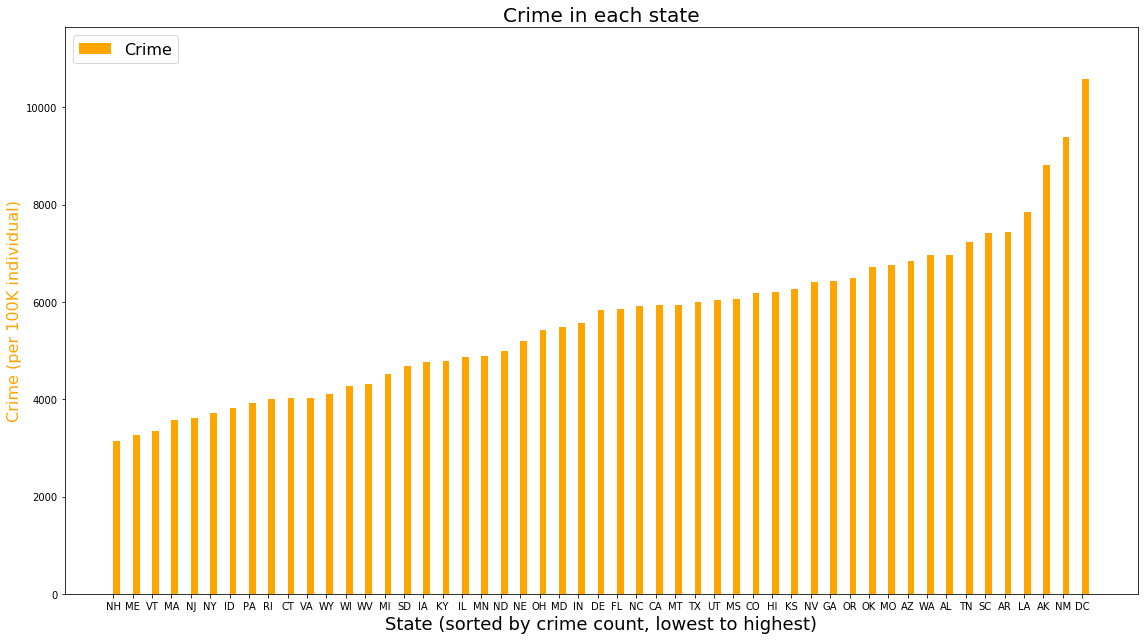

In [14]:
Reasons13_reduced_df = Reasons13_df
Reasons13_reduced_df = Reasons13_reduced_df.sort_values('crime count (per 100K)',ascending=True)
width = 0.35
labels = Reasons13_reduced_df["state"]
Crime_Count = Reasons13_reduced_df["crime count (per 100K)"]

x = np.arange(len(labels))

fig, ax2 = plt.subplots(figsize=(16,9))

font = { 'color':  'orange',
        'weight': 'normal',
        'size': 16,
        }
rects2 = ax2.bar(x + width/2, Crime_Count, width, label='Crime',color=font["color"])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Crime (per 100K individual)', fontdict=font)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylim(ymin=0, ymax=(Crime_Count.max())*1.1)
ax2.legend(loc="upper left", fontsize=font["size"])
ax2.set_title('Crime in each state', fontdict = {"size":20})
ax2.set_xlabel('State (sorted by crime count, lowest to highest)', fontdict={"size":18})

fig.tight_layout()
fig.savefig("Output/AllStatesBar_Crime_Bar.png")

## Visual 6: Bar chart of Facility and Crime count, for selected states

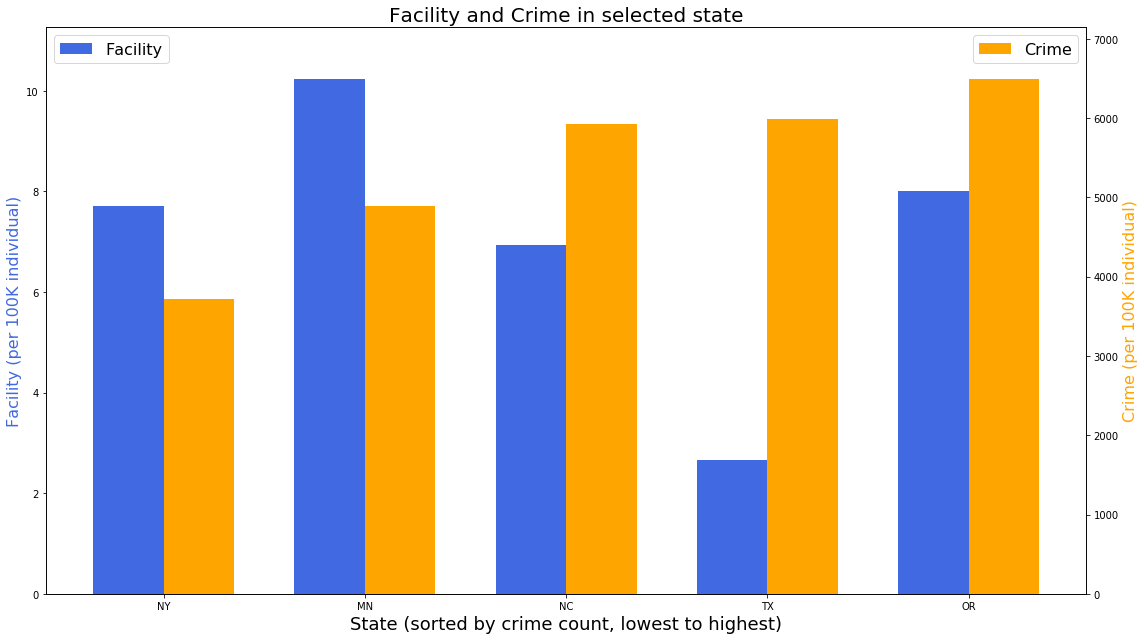

In [15]:
# Filtering the Dataframe for just the list of states
Reasons13_reduced_df = Reasons13_df[Reasons13_df.state.isin(State_list)]

#Ploting
Reasons13_reduced_df = Reasons13_reduced_df.sort_values('crime count (per 100K)',ascending=True)
width = 0.35
labels = Reasons13_reduced_df["state"]
Facility_Count = Reasons13_reduced_df["Facility Count (per 100K)"]
Crime_Count = Reasons13_reduced_df["crime count (per 100K)"]

x = np.arange(len(labels))

fig, ax1 = plt.subplots(figsize=(16,9))

font = { 'color':  'royalblue',
        'weight': 'normal',
        'size': 16,
        }
rects1 = ax1.bar(x - width/2, Facility_Count, width, label='Facility', color=font["color"])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Facility (per 100K individual)', fontdict=font)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylim(ymin=0, ymax=(Facility_Count.max())*1.1)
ax1.legend(loc="upper left", fontsize=font["size"])
ax1.set_title('Facility and Crime in selected state', fontdict = {"size":20})
ax1.set_xlabel('State (sorted by crime count, lowest to highest)', fontdict={"size":18})

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

font = { 'color':  'orange',
        'weight': 'normal',
        'size': 16,
        }
rects2 = ax2.bar(x + width/2, Crime_Count, width, label='Crime',color=font["color"])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Crime (per 100K individual)', fontdict=font)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylim(ymin=0, ymax=(Crime_Count.max())*1.1)
ax2.legend(loc="upper right", fontsize=font["size"])
# added these three lines
# lns = rects1+rects2
# labs = [l.get_label() for l in lns]
# ax2.legend(lns, labs, loc="upper right")

fig.tight_layout()
fig.savefig("Output/SelectedStatesBar_Facility_Crime_Bar.png")

## Specific Crimes

In [17]:
# checking only Specific Crime
specific_crime = "robbery"
specific_crime_per100k = specific_crime + " (per 100K)"
Reasons13All_df["crime count (per 100K)"] = Reasons13All_df[specific_crime_per100k]
Reasons13_df = Reasons13All_df[["state","year","population","Facility Count (per 100K)","crime count (per 100K)"]]
# Reasons13_df

In [18]:
# National average of Facility count and Crime Count
US_Facility_Average = Reasons13_df["Facility Count (per 100K)"].mean()
US_Crime_Average = Reasons13_df["crime count (per 100K)"].mean()

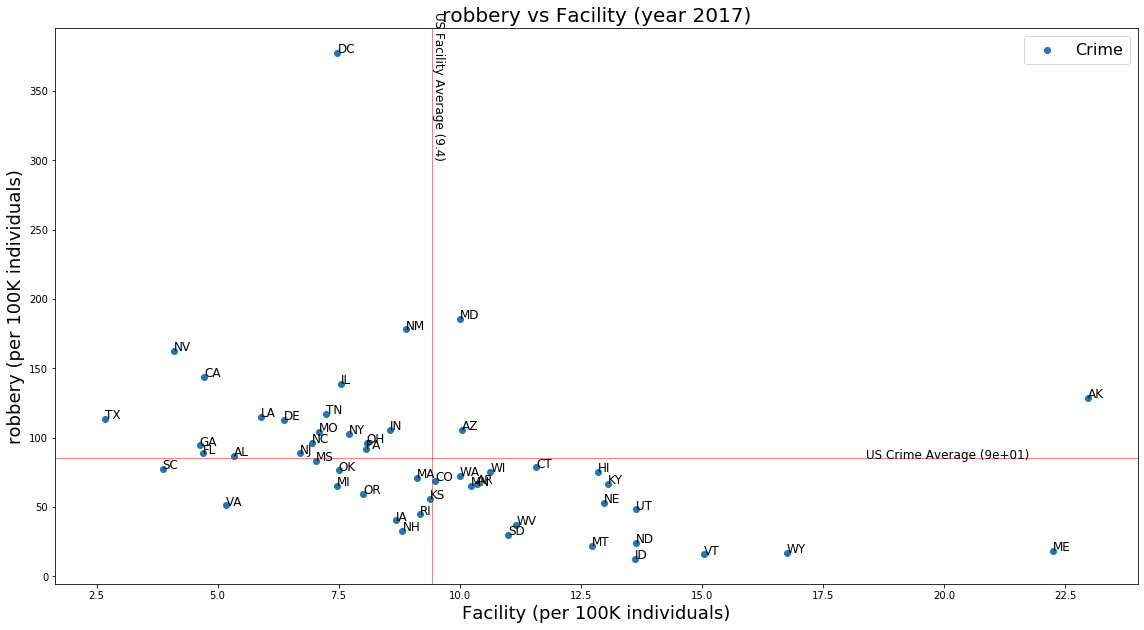

In [19]:
Reasons13_reduced_df = Reasons13_df
Facility_Count = Reasons13_reduced_df["Facility Count (per 100K)"]
Crime_Count = Reasons13_reduced_df["crime count (per 100K)"]

fig, ax = plt.subplots(figsize=(16,9))

ax.scatter(Facility_Count, Crime_Count, marker="o", label='Crime')

font = { 'color':  'orange',
        'weight': 'normal',
        'size': 16,
        }
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(specific_crime + ' (per 100K individuals)', fontdict={"size":18})
ax.legend(loc="best", fontsize=font["size"])
ax.set_title(specific_crime + ' vs Facility (year 2017)', fontdict = {"size":20})
ax.set_xlabel('Facility (per 100K individuals)', fontdict={"size":18})

#Marking for national average 
ax.axvline(US_Facility_Average, linestyle='-', color='red', alpha=0.5, linewidth=1)
ax.axhline(US_Crime_Average, linestyle='-', color='red', alpha=0.5, linewidth=1)

ax.text(x = US_Facility_Average , y = Crime_Count.max()*0.8, s = "US Facility Average ({:.2})".format(US_Facility_Average), size = 12, horizontalalignment='left', rotation=-90, color='black')
ax.text(x = Facility_Count.max()*0.8 , y = US_Crime_Average, s = "US Crime Average ({:,.1})".format(US_Crime_Average), size = 12, rotation=0, color='black')

# mark each data points
for index, row in Reasons13_reduced_df.iterrows():
    ax.text(x = row["Facility Count (per 100K)"] , y = row["crime count (per 100K)"], s = row["state"], size = 12)
    
fig.tight_layout()
# Save the Figure
fig.savefig("Output/AllState_" + specific_crime + "_Facility_Scatter.png")

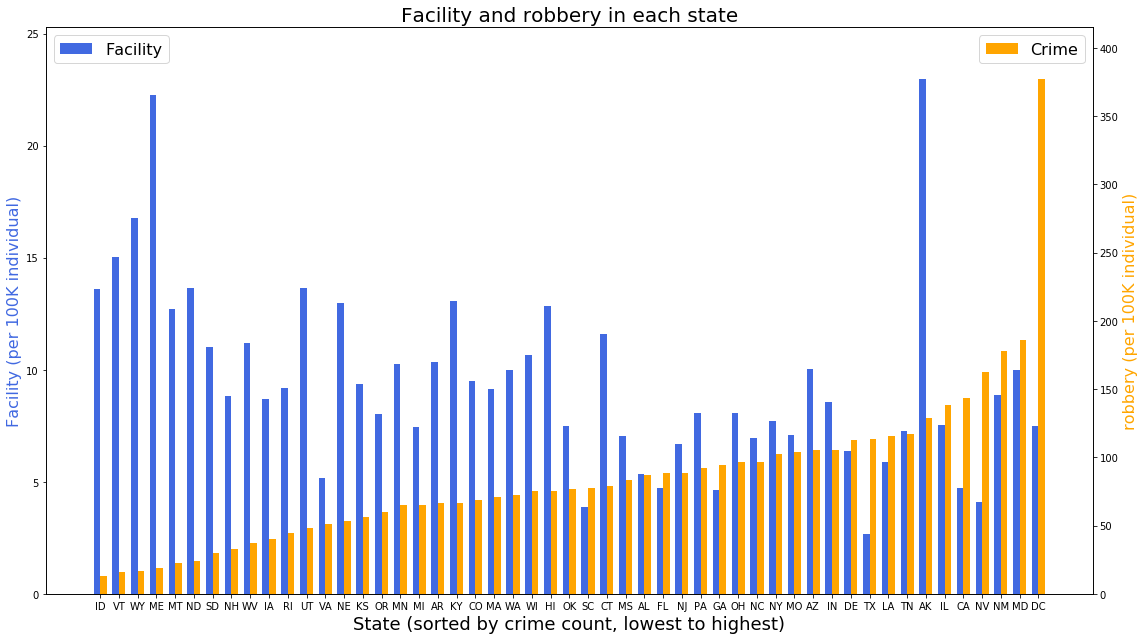

In [20]:
Reasons13_reduced_df = Reasons13_df
Reasons13_reduced_df = Reasons13_reduced_df.sort_values('crime count (per 100K)',ascending=True)
width = 0.35
labels = Reasons13_reduced_df["state"]
Facility_Count = Reasons13_reduced_df["Facility Count (per 100K)"]
Crime_Count = Reasons13_reduced_df["crime count (per 100K)"]

x = np.arange(len(labels))

fig, ax1 = plt.subplots(figsize=(16,9))

font = { 'color':  'royalblue',
        'weight': 'normal',
        'size': 16,
        }
rects1 = ax1.bar(x - width/2, Facility_Count, width, label='Facility', color=font["color"])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Facility (per 100K individual)', fontdict=font)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylim(ymin=0, ymax=(Facility_Count.max())*1.1)
ax1.legend(loc="upper left", fontsize=font["size"])
ax1.set_title('Facility and ' + specific_crime + ' in each state', fontdict = {"size":20})
ax1.set_xlabel('State (sorted by crime count, lowest to highest)', fontdict={"size":18})

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

font = { 'color':  'orange',
        'weight': 'normal',
        'size': 16,
        }
rects2 = ax2.bar(x + width/2, Crime_Count, width, label='Crime',color=font["color"])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel(specific_crime + ' (per 100K individual)', fontdict=font)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylim(ymin=0, ymax=(Crime_Count.max())*1.1)
ax2.legend(loc="upper right", fontsize=font["size"])
# added these three lines
# lns = rects1+rects2
# labs = [l.get_label() for l in lns]
# ax2.legend(lns, labs, loc="upper right")

fig.tight_layout()
fig.savefig("Output/AllStatesBar_Facility_" + specific_crime + "_Bar.png")